# Advanced Regression Techniques

Kaggle Competition found here https://www.kaggle.com/c/house-prices-advanced-regression-techniques/ 

Where we will predict sales prices and practice feature engineering, RFs, and gradient boosting. 

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display

It is my job to predict the sales price for each house. For each Id in the test set, I must predict the value of the SalePrice variable. 

## Importing Data

In [2]:
data_train = pd.read_csv('C:/Users/Kycool13/Documents/GitHub/Kaggle/House_Prices-Advanced_Regression/train.csv')
data_test = pd.read_csv('C:/Users/Kycool13/Documents/GitHub/Kaggle/House_Prices-Advanced_Regression/test.csv')

## Data Exploration        

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
data_train.shape

(1460, 81)

Here we see this data set contains  81 explanatory variables with 1460 houses sold. 

In [5]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Values

Now let's check for missing values, to do this, let's look in both test and training. 

In [42]:
all_data = pd.concat((data_train.loc[:,'MSSubClass':'SaleCondition'],
                      data_test.loc[:,'MSSubClass':'SaleCondition']))

In [43]:
all_data.columns[all_data.isnull().any()]

Index([u'MSZoning', u'LotFrontage', u'Alley', u'Utilities', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Electrical',
       u'BsmtFullBath', u'BsmtHalfBath', u'KitchenQual', u'Functional',
       u'FireplaceQu', u'GarageType', u'GarageYrBlt', u'GarageFinish',
       u'GarageCars', u'GarageArea', u'GarageQual', u'GarageCond', u'PoolQC',
       u'Fence', u'MiscFeature', u'SaleType'],
      dtype='object')

These 34 features all have missing values. Let's see how many missing values are in each column.

In [48]:
x = all_data.isnull().sum().sort_values(ascending=False)
print x[x>0] #columns with many number of nulls

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64


In [53]:
#Missing value counts in each of these columns
miss = all_data.isnull().sum()/len(all_data)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

TotalBsmtSF     0.000343
GarageArea      0.000343
GarageCars      0.000343
KitchenQual     0.000343
Electrical      0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
SaleType        0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
Functional      0.000685
Utilities       0.000685
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
MSZoning        0.001370
MasVnrArea      0.007879
MasVnrType      0.008222
BsmtFinType1    0.027064
BsmtFinType2    0.027407
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
GarageType      0.053786
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
LotFrontage     0.166495
FireplaceQu     0.486468
Fence           0.804385
Alley           0.932169
MiscFeature     0.964029
PoolQC          0.996574
dtype: float64

PoolQC, MiscFeature, and Alley all have a large percent missing. Let's visualize the missing values. 

AttributeError: 'module' object has no attribute 'plt'

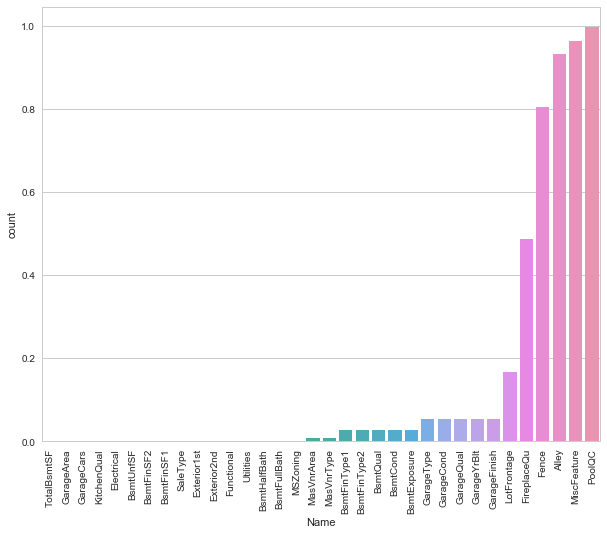

In [45]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()

Let's use the documentation of data_description.txt provided to help us understand the missing values, and determine how to impute them. 

We need to examine all variables from above to determine if we need to manually change their values, or to use one-hot encoding, to transform categorical features into a format that works better for our regression. 

In [46]:
print all_data[(all_data.PoolArea==0) | (all_data.PoolArea.isnull())].shape[0]
print all_data[(all_data.Fireplaces==0) | (all_data.Fireplaces.isnull())].shape[0]
print all_data[(all_data.TotalBsmtSF==0) | (all_data.TotalBsmtSF.isnull())].shape[0]
print all_data[(all_data.TotalBsmtSF.isnull())].shape[0]
print all_data[(all_data.GarageArea==0) | (all_data.GarageArea.isnull())].shape[0]
print all_data[(all_data.GarageArea.isnull())].shape[0]

2906
1420
79
1
158
1


* 2906 Houses have no pool, but 2909 have PoolQC as null, 3 are missing PoolQC data
* 1420 houses have no fireplace, and 1420 FireplaceQu as null, not missing any data
* 79 houses have no basesment, but from BsmtFinType1 79, and Type2 we have 80, while Bsmt Qual, Exposure, and Condition have 81/82. So our true value lies in 79-82. 
* 157 houses have no garage, 1 has null and 159 have Garage features null, ->2 missing data
* 23 houses have MasVnrArea of null and 24 have MasVnrType as null -> 1 missing data.

Next let's check which columns are missing Basement and Garage Info

In [55]:
print all_data[all_data.BsmtCond.isnull() & all_data.TotalBsmtSF!=0].index
print all_data[all_data.BsmtExposure.isnull() & all_data.TotalBsmtSF!=0].index
print all_data[all_data.BsmtQual.isnull() & all_data.TotalBsmtSF!=0].index
print all_data[all_data.BsmtFinType2.isnull() & all_data.TotalBsmtSF!=0].index
print all_data[all_data.BsmtFinType1.isnull() & all_data.TotalBsmtSF!=0].index
print all_data[all_data.TotalBsmtSF.isnull()].index # should we drop this guy?
print all_data[all_data.GarageArea.isnull()].index # should we drop this guy?

Int64Index([580, 725, 1064], dtype='int64')
Int64Index([948, 27, 888], dtype='int64')
Int64Index([757, 758], dtype='int64')
Int64Index([332], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([660], dtype='int64')
Int64Index([1116], dtype='int64')


In [68]:
#Let's handle missing values where replacing them with mean doesn't make sense

#Bsmt : data description says NA for basement features is "no basement"
all_data["BsmtFinSF1"].fillna(0, inplace=True)
all_data["BsmtFinSF2"].fillna(0, inplace=True)
all_data["BsmtUnfSF"].fillna(0, inplace=True)
all_data["BsmtFullBath"].fillna(0, inplace=True)
all_data["BsmtHalfBath"].fillna(0, inplace=True)
#GarageType: Let's make it null since it's GarageArea is null
all_data.loc[1116, 'GarageType'] = np.nan
#GarageArea: data description says NA for garage features is "no garage"
all_data["GarageArea"].fillna(0, inplace=True)
#GarageCars:  data description says NA for garage features is "no garage"
all_data["GarageCars"].fillna(0, inplace=True)

In [ ]:
#Let's Impute LotFrontage by median of hte neighborhood

lot_frontage_by_neighborhood = data_train['LotFrontage'].groupby(data_train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (all_data['Neighborhood'] == key) & (all_data['LotFrontage'].isnull())
                all_data.loc[idx, 'LotFrontage'] = group.median()

In [58]:
#Remove outliers

#The author of the dataset recommends removing 'any houses with more than 4000 #square feet' from the dataset.
#Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
        
data_train.drop(data_train[data_train['GrLivArea'] > 4000].index, inplace=True)

In [69]:
# Some numerical features are actually really categories
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

Next we'll look at Ordinal Features which are naturally ordered and lend themselves to numerical encoding

In [70]:
# Encode some categorical features as ordered numbers when there is information in the order
all_data = all_data.replace({"BsmtCond" : {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {np.nan : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {np.nan : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {np.nan : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {np.nan : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {np.nan: 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {np.nan : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             #Check below this line, might be suspect for order      
                       "PoolQC" : {np.nan : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

## Feature Engineering
Most categorical variables have near-zero variance distribution. Near-zero variance distribution is when one of the categories in a variable has >90% of the values. We'll create some binary variables depicting the presence or absence of a category. The new features will contain 0 or 1 values. In addition, we'll create some more variables which are self-explanatory with comments. Then we'll create more new features in these 3 ways:

1. Simplify existing features
2. Combine existing features
3. Polynomial of the top 10 existing features

In [ ]:
#Creating new variable (1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0

# IR2 and IR3 don't appear that often, so just make a distinction between regular and irregular.
all_data["IsRegularLotShape"] = (all_data["LotShape"] == "Reg") * 1

# Most land slopes are gentle; treat the others as "not gentle".
all_data["IsLandSlopeGentle"] = (all_data["LandSlope"] == "Gtl") * 1

# Most have a paved drive. Treat dirt/gravel and partial pavement
# as "not paved".
all_data["IsPavedDrive"] = (all_data["PavedDrive"] == "Y") * 1

## Variable Exploration

Let's look at the Target Variable: SalePrice

In [9]:
data_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's get and idea of the distribution and check for skewness. 

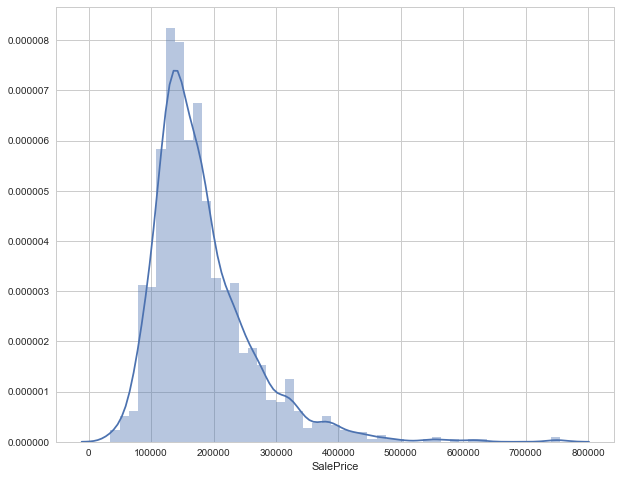

In [10]:
sns.distplot(data_train['SalePrice'])

We can see the distribution is right-skewed. To make this distribution more normally distributed let's log transform it. We do this because a normally distributed target variable helps in better modeling the relationship between the taget and other independent variables. 

Let's log-transform this data

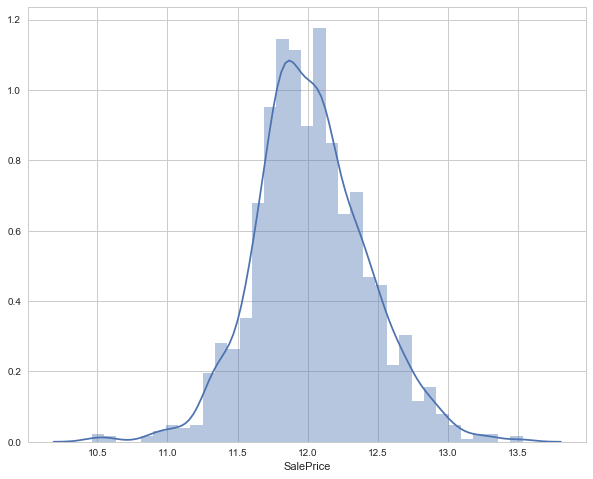

In [11]:
target = np.log(data_train['SalePrice'])
sns.distplot(target)

Let's split our data into categorical, and numerical to explore each separately.

In [32]:
#Separate variables into new data frames
numeric_train = data_train.select_dtypes(include=[np.number])
cat_train = data_train.select_dtypes(exclude=[np.number])
print "There are {} numeric, including the target, and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1])

There are 38 numeric, including the target, and 44 categorical columns in train data


Since Id is a number, but not a numeric value we should drop it. 

In [40]:
#This only needs to be executed once
#data_train.drop("Id", axis = 1, inplace = True)

Let's investigate how correlated our variables are:

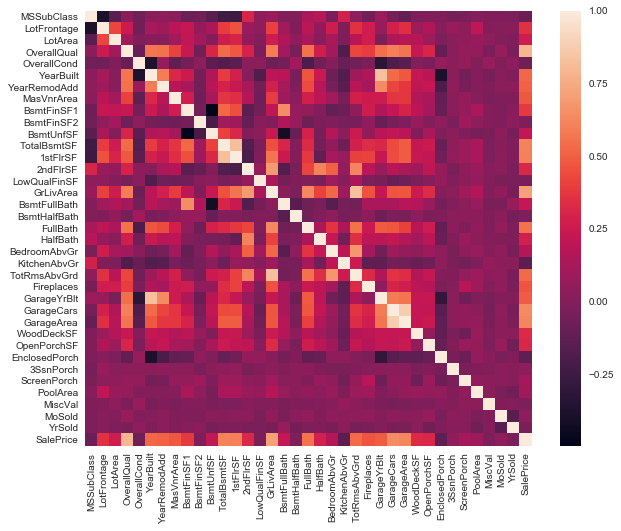

In [34]:
corr = numeric_train.corr()
sns.heatmap(corr)

We can see that for SalePrice there are a few variables correlated, but it's tough. Let's use a numeric correclation score, to better understand the graph.

In [16]:
print corr['SalePrice'].sort_values(ascending=False)[:15], '\n'

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



Let's start by inspecting the numerical variables like GrLivArea and TotalBsmtSF, and then move on to categorical variables like OverallQual

### Numerical Variables

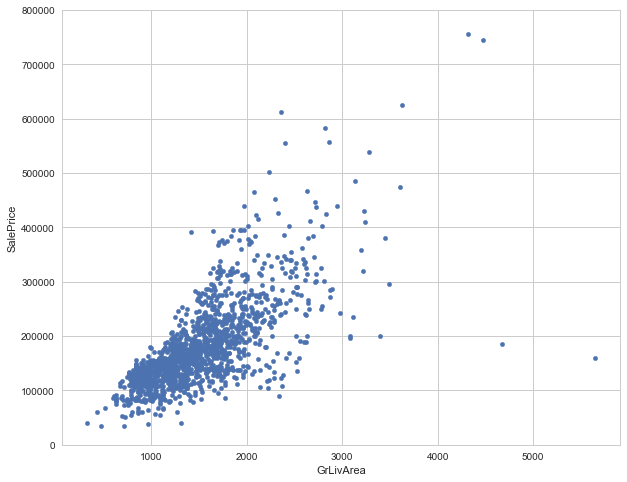

In [17]:
#ScatterPlot of GrLivArea v SalePrice
var = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We see a direct correlation with living area and SalePrice. We notice a few extreme values. Two possible outliers in the bottom right. They appear to be very large houses that sold for cheap.

Let's look at histograms of all numeric values to see if they have any skewness. 

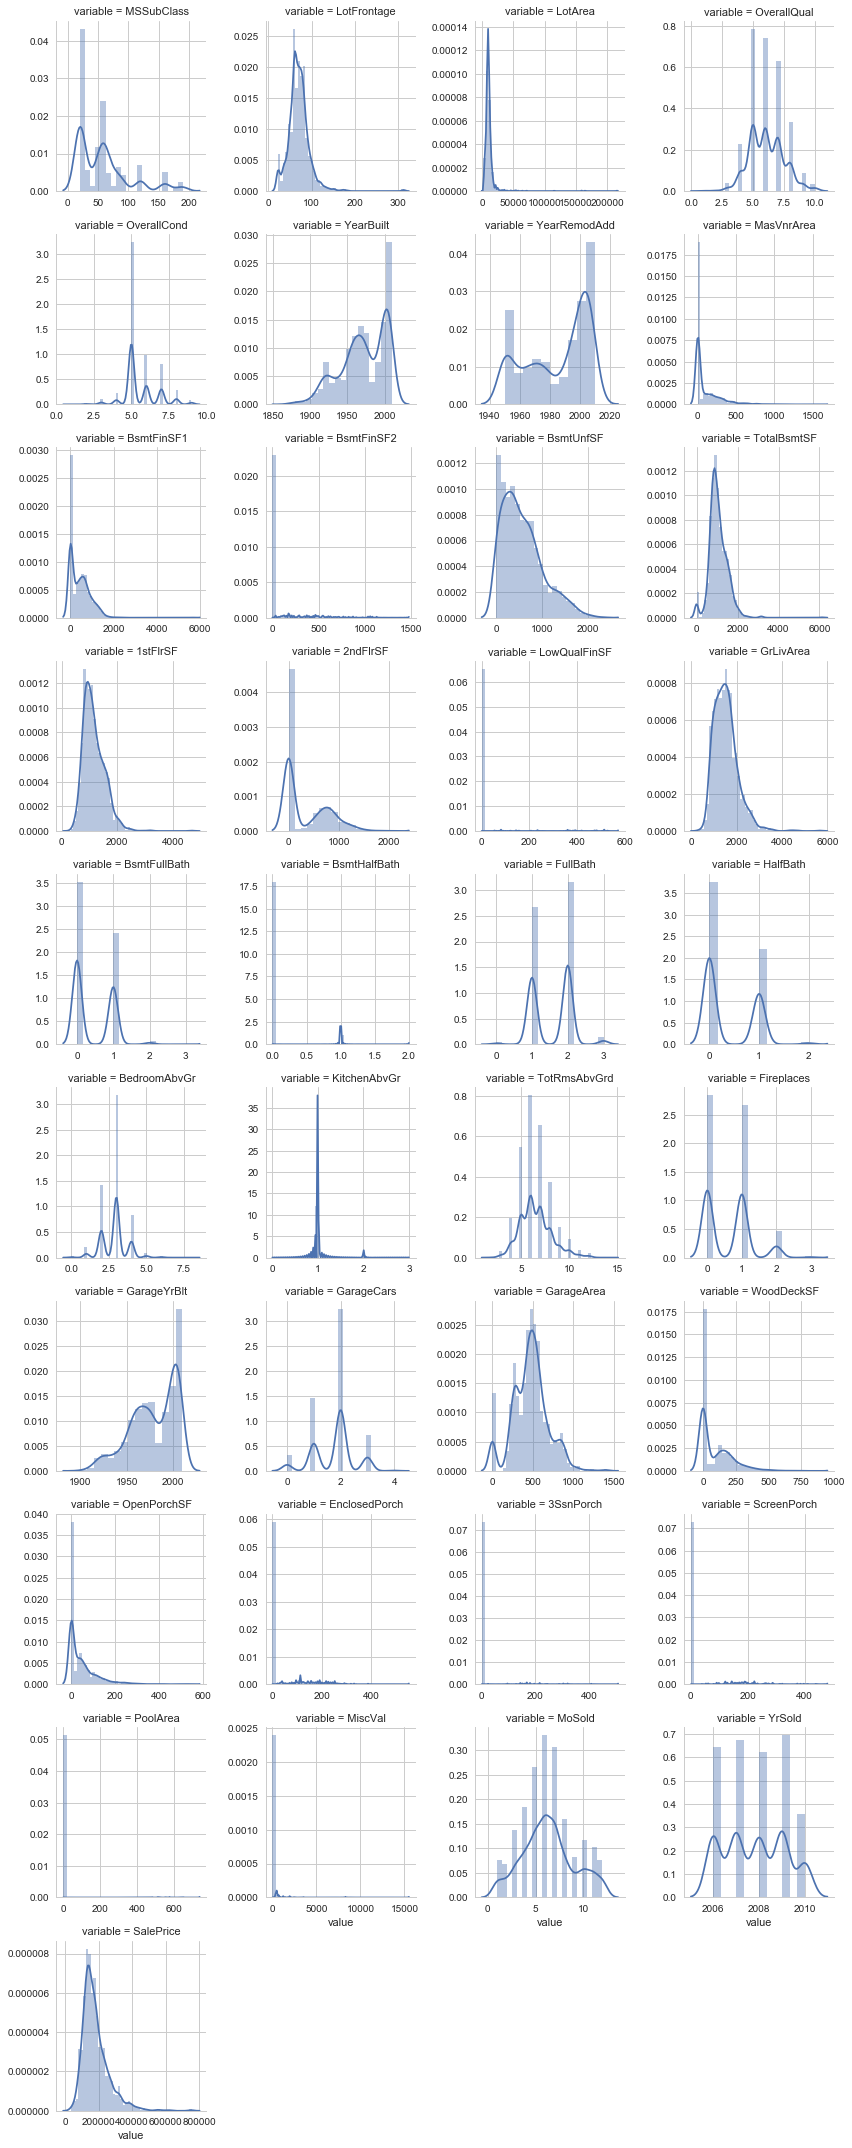

In [25]:
#create numeric plots
num = [f for f in data_train.columns if data_train.dtypes[f] != 'object']
#num.remove('Id')
nd = pd.melt(data_train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

We can see that a lot of this numeric values are skewed. Let's transform any skewed numerical features using log-transform.

In [37]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = numeric_train.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
numeric_train[skewed_features] = np.log1p(numeric_train[skewed_features])


C:\Users\Kycool13\Anaconda2\lib\site-packages\scipy\stats\stats.py:1031: RuntimeWarning: invalid value encountered in power
  lambda m2, m3: m3 / m2**1.5,
C:\Users\Kycool13\Anaconda2\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


27 skewed numerical features to log transform


Let's use 0.8 to detect which features are skewed, and print them

In [39]:
#skewed_features = data_train[numeric_train].columns[np.absolute(stats.skew(data_train[numeric_train]))> 0.8]
#print skewed_features

 ### Categorical Variables

In [18]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Getting back to Overal Quality vs SalePrice

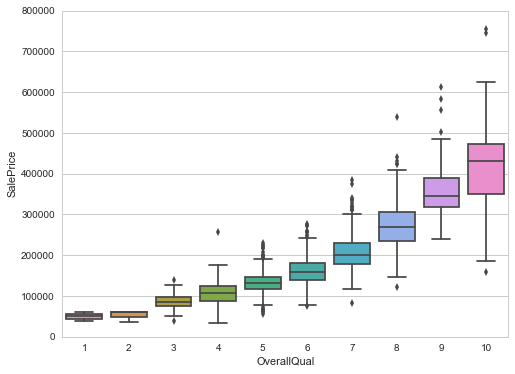

In [19]:
#box plot Overall Quality vs Sales Price
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

An ANOVA test will let us understand the correlation between categorical variables and SalePrice. ANOVA is a statistics technique for Hypothesis testing to determine if there exists a sifnificant difference in the mean of groups. 

Let's define our Hypothesis:

Ho: There is no significant difference between the categorical groups
Ha: There exist a significant difference between the groups

C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<module 'matplotlib.pyplot' from 'C:\Users\Kycool13\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

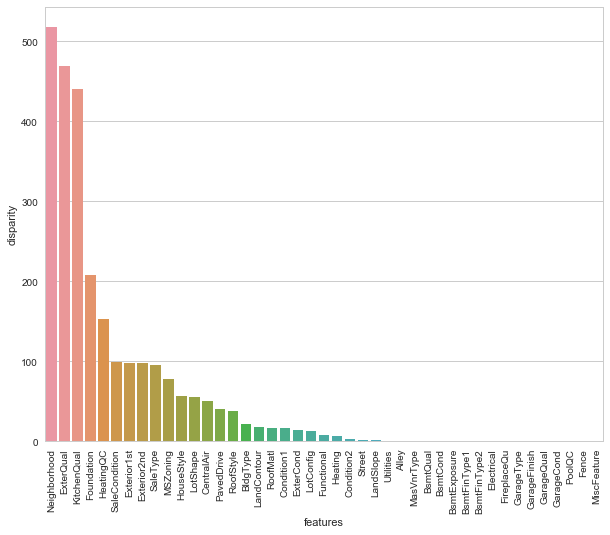

In [22]:
cat = [f for f in data_train.columns if data_train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = data_train.SalePrice.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

This ranks our categorical variables where we can see Neighborhood, followed by ExterQual and KitchenQual are teh most important features.

Are there any categorical variables to log transform